In [2]:

# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('test.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

(29, 15)
Epoch 1/200
0s - loss: 31.6453
Epoch 2/200
0s - loss: 26.3378
Epoch 3/200
0s - loss: 21.2427
Epoch 4/200
0s - loss: 16.8630
Epoch 5/200
0s - loss: 12.9789
Epoch 6/200
0s - loss: 10.5128
Epoch 7/200
0s - loss: 7.3758
Epoch 8/200
0s - loss: 5.4763
Epoch 9/200
0s - loss: 4.2321
Epoch 10/200
0s - loss: 3.1442
Epoch 11/200
0s - loss: 2.5157
Epoch 12/200
0s - loss: 2.1276
Epoch 13/200
0s - loss: 1.8799
Epoch 14/200
0s - loss: 1.7227
Epoch 15/200
0s - loss: 1.6374
Epoch 16/200
0s - loss: 1.5869
Epoch 17/200
0s - loss: 1.5625
Epoch 18/200
0s - loss: 1.5303
Epoch 19/200
0s - loss: 1.5179
Epoch 20/200
0s - loss: 1.5016
Epoch 21/200
0s - loss: 1.4904
Epoch 22/200
0s - loss: 1.4678
Epoch 23/200
0s - loss: 1.4540
Epoch 24/200
0s - loss: 1.4433
Epoch 25/200
0s - loss: 1.4217
Epoch 26/200
0s - loss: 1.4178
Epoch 27/200
0s - loss: 1.3931
Epoch 28/200
0s - loss: 1.3776
Epoch 29/200
0s - loss: 1.3603
Epoch 30/200
0s - loss: 1.3476
Epoch 31/200
0s - loss: 1.3371
Epoch 32/200
0s - loss: 1.3309
Ep

ValueError: could not broadcast input array from shape (18,1) into shape (5,1)

In [4]:
%bash
pip install nnet-ts

  Running setup.py bdist_wheel for nnet-ts: started
  Running setup.py bdist_wheel for nnet-ts: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/47/fa/23/e16e8876275e58d1a4a6415e8d0eb1bdeb26dd58737d674a77
Successfully built nnet-ts


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
from nnet_ts import *

time_series = np.array(pd.read_csv("export.csv")["pc"])

In [13]:
neural_net = TimeSeriesNnet(hidden_layers = [20, 15, 5], activation_functions = ['sigmoid', 'sigmoid', 'sigmoid'])

In [15]:
neural_net.fit(time_series, lag = 10, epochs = 100)
neural_net.predict_ahead(n_ahead = 12)

INFO:Building regressor matrix
INFO:Scaling data
INFO:Checking network consistency
INFO:Training neural net


array([ 1.67501307,  1.66616559,  1.65493095,  1.67148447,  1.66681159,
        1.66200352,  1.67001688,  1.66180587,  1.66541183,  1.66352367,
        1.66356361,  1.66359818])

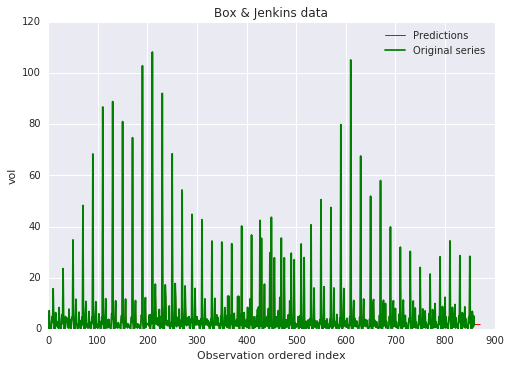

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(len(neural_net.timeseries)), neural_net.timeseries, '-r', label='Predictions', linewidth=1)
plt.plot(range(len(time_series)), time_series, '-g',  label='Original series')
plt.title("Box & Jenkins data")
plt.xlabel("Observation ordered index")
plt.ylabel("vol")
plt.legend()
plt.show()

In [29]:

# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = pandas.read_csv("export.csv", delimiter=",", usecols=(0, 1))
# split into input (X) and output (Y) variables
X = dataset[:,0:45]
Y = dataset[:,1:1]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, nb_epoch=150, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X)

TypeError: unhashable type

In [30]:
Y

,time,pc
0,1.0,1.192399
